**Import Libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Load Data


In [26]:
data=pd.read_csv('/content/Training Data - Classification of Patients with Abnormal Blood Pressure ....csv')
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


Data Shape

In [27]:
data.shape

(2000, 15)

data stucture

In [28]:
data.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


Data Info

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

Genetic_Pedigree_Coefficient , Pregnancy and alcohol_consumption_per_day have some missing values.
Whereas, **pregnancy** feature has very large missing values. Which is the innate nature of the data as all of the patients can't be pregnant women. Because pregnancy data is given only for mostly female patient where Sex = 1.


**Collinearity check for features**

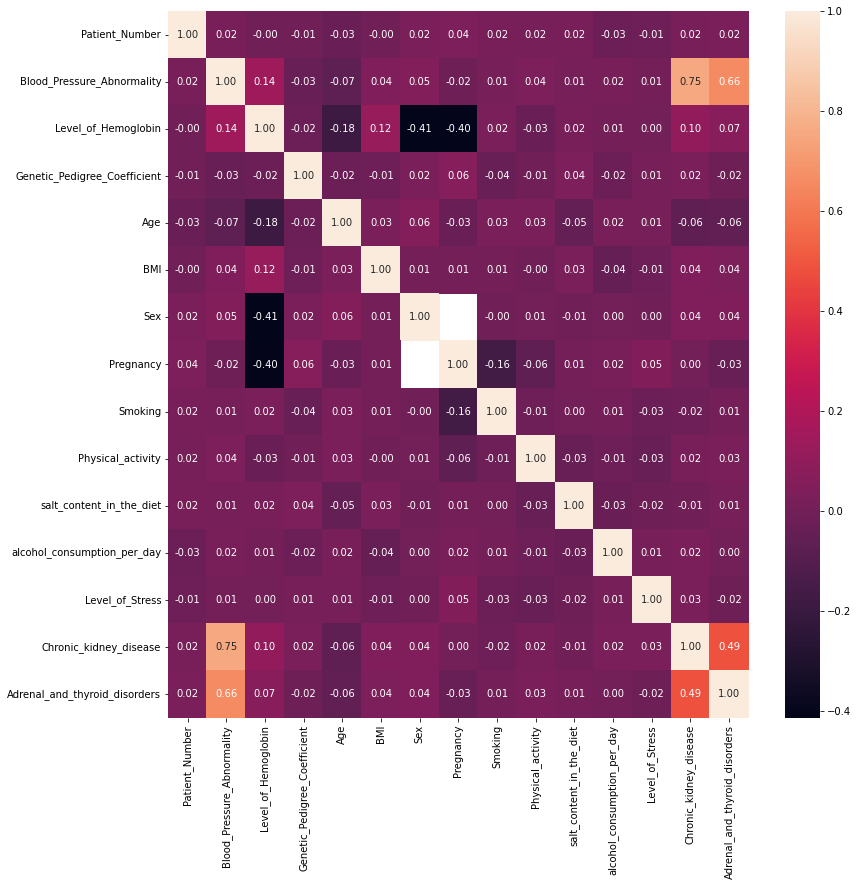

In [30]:
plt.subplots(figsize=(13,13))
sns.heatmap(data.corr(),vmax=1, annot=True,  fmt='.2f')

To see Collinearity for feature Genetic_Pedigree_Coefficient, Level_of_Hemoglobin , Blood_Pressure_Abnormality.

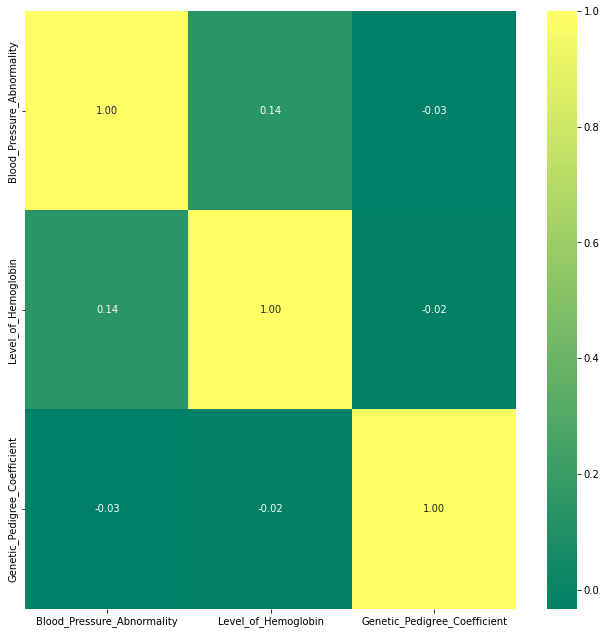

In [31]:
plt.subplots(figsize=(11,11))
sns.heatmap(data.iloc[:,1:4].corr(), vmax=1, annot=True, fmt='.2f', cmap='summer' )
#No significant correlated features found

**Missing value treatment**

In [32]:
data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

**% of missing data**

In [33]:
data.isnull().sum()/2000 * 100
# Genetic_Pedigree_Coefficient has 4.6 % of missing data , alcohol_consumption_per_day has 12% missing data while pregnancy has 77.9% missing data

Patient_Number                    0.0
Blood_Pressure_Abnormality        0.0
Level_of_Hemoglobin               0.0
Genetic_Pedigree_Coefficient      4.6
Age                               0.0
BMI                               0.0
Sex                               0.0
Pregnancy                        77.9
Smoking                           0.0
Physical_activity                 0.0
salt_content_in_the_diet          0.0
alcohol_consumption_per_day      12.1
Level_of_Stress                   0.0
Chronic_kidney_disease            0.0
Adrenal_and_thyroid_disorders     0.0
dtype: float64

There are minimal no. of missing values so we can fill them with simple imputation with median for Genetic_Pedigree_Coefficient feature


In [34]:
data['Genetic_Pedigree_Coefficient']=data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].median())

In [35]:
data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

Mising value treatment in alcohol_consumption_per_day

In [36]:
print("Median: {:.2f}".format(data['alcohol_consumption_per_day'].median()))
print("Mean: {:.2f}".format(data['alcohol_consumption_per_day'].mean()))
# there is no major differece in Median and Mean , so we will perform median imputation

Median: 250.00
Mean: 251.01


In [37]:
data['alcohol_consumption_per_day']=data['alcohol_consumption_per_day'].fillna(data['alcohol_consumption_per_day'].median())

In [38]:
data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day         0
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

**Mising value treatment in Pregnancy**

In [39]:
print("Male Patient: {}". format(data[data["Sex"]== 0]['Sex'].count()))
print("Female Patient: {}". format(data[data["Sex"]== 1]['Sex'].count()))


Male Patient: 1008
Female Patient: 992


In [40]:
print('Male pregency missing data value counts: {} '.format(data[data["Sex"]== 0]['Pregnancy'].isnull().sum()))
# all male member prefency count are missing which should be '0=No'

Male pregency missing data value counts: 1008 


We need to put 0 for all male sex feature in pregnency column 

In [41]:
data[data["Sex"] == 0]['Pregnancy'].isnull().sum()

1008

In [42]:
data['Pregnancy'] = data[data["Sex"] == 0]['Pregnancy'].fillna(0)

In [43]:
data[data["Sex"]== 1].loc[data["Age"]>55]['Pregnancy'].isnull().sum()
#Female with age greater than 55 with null values

360

In [44]:
data['Pregnancy']=data[data["Sex"]== 1].loc[data["Age"]>55]['Pregnancy'].fillna(0)
#Female with age greater than 55 will not be pregnent then we will replace with 0 

In [45]:
print("Mean Age of left out women: {:.2f}".format(data[data["Pregnancy"].isnull() == True]["Age"].mean()))
print("Median Age of left out women: {:.2f}".format(data[data["Pregnancy"].isnull() == True]["Age"].median()))

# Most of these women whose pregnancy status we don't know, are mostly around 41 years (see below the mean and mode and the count plot) in age. 
# In such age, it is highly unlikely that they are pregnant.

Mean Age of left out women: 42.24
Median Age of left out women: 41.00


In [46]:
#we will replace all null value in Pregnancy with 0 
data["Pregnancy"]=data["Pregnancy"].replace(np.nan,0 )

In [47]:
data.info()
# there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   2000 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      2000 non-null   float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    2000 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [48]:
#Check Target varaible(Blood_Pressure_Abnormality) ratio
Normal = len(data[data['Blood_Pressure_Abnormality'] == 0])
Abnormal = len(data[data['Blood_Pressure_Abnormality'] == 1])
print("no. of Normal cases: {0} ({1:2.2f}%)".format(Normal, (Normal*100/(Normal+Abnormal))))
print("no. of Abnormal cases: {0} ({1:2.2f}%)".format(Abnormal, (Abnormal*100/(Normal+Abnormal))))
#both cases have fair amount of cases standard predictions can be used
#Good distribution of Normal and Abnormal cases. No special work needed.


no. of Normal cases: 1013 (50.65%)
no. of Abnormal cases: 987 (49.35%)


**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


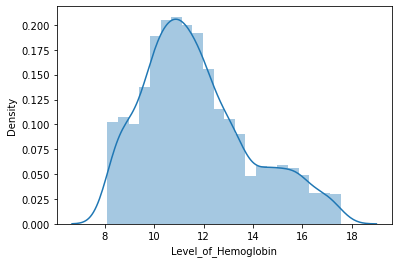

In [49]:
sns.distplot(data['Level_of_Hemoglobin'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


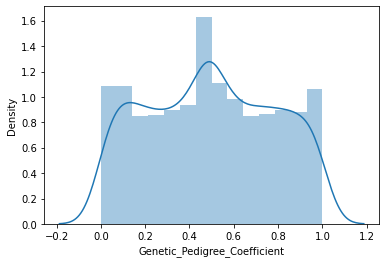

In [50]:
sns.distplot(data['Genetic_Pedigree_Coefficient'])

Outliers Visualization for all features

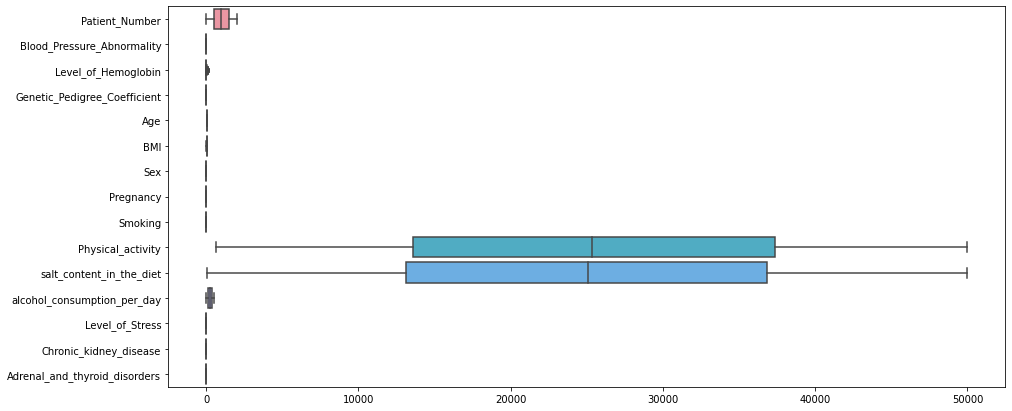

In [51]:
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=data, orient='h')
#There are no outliers.

Checking the pairwise relationship of non-categorical features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


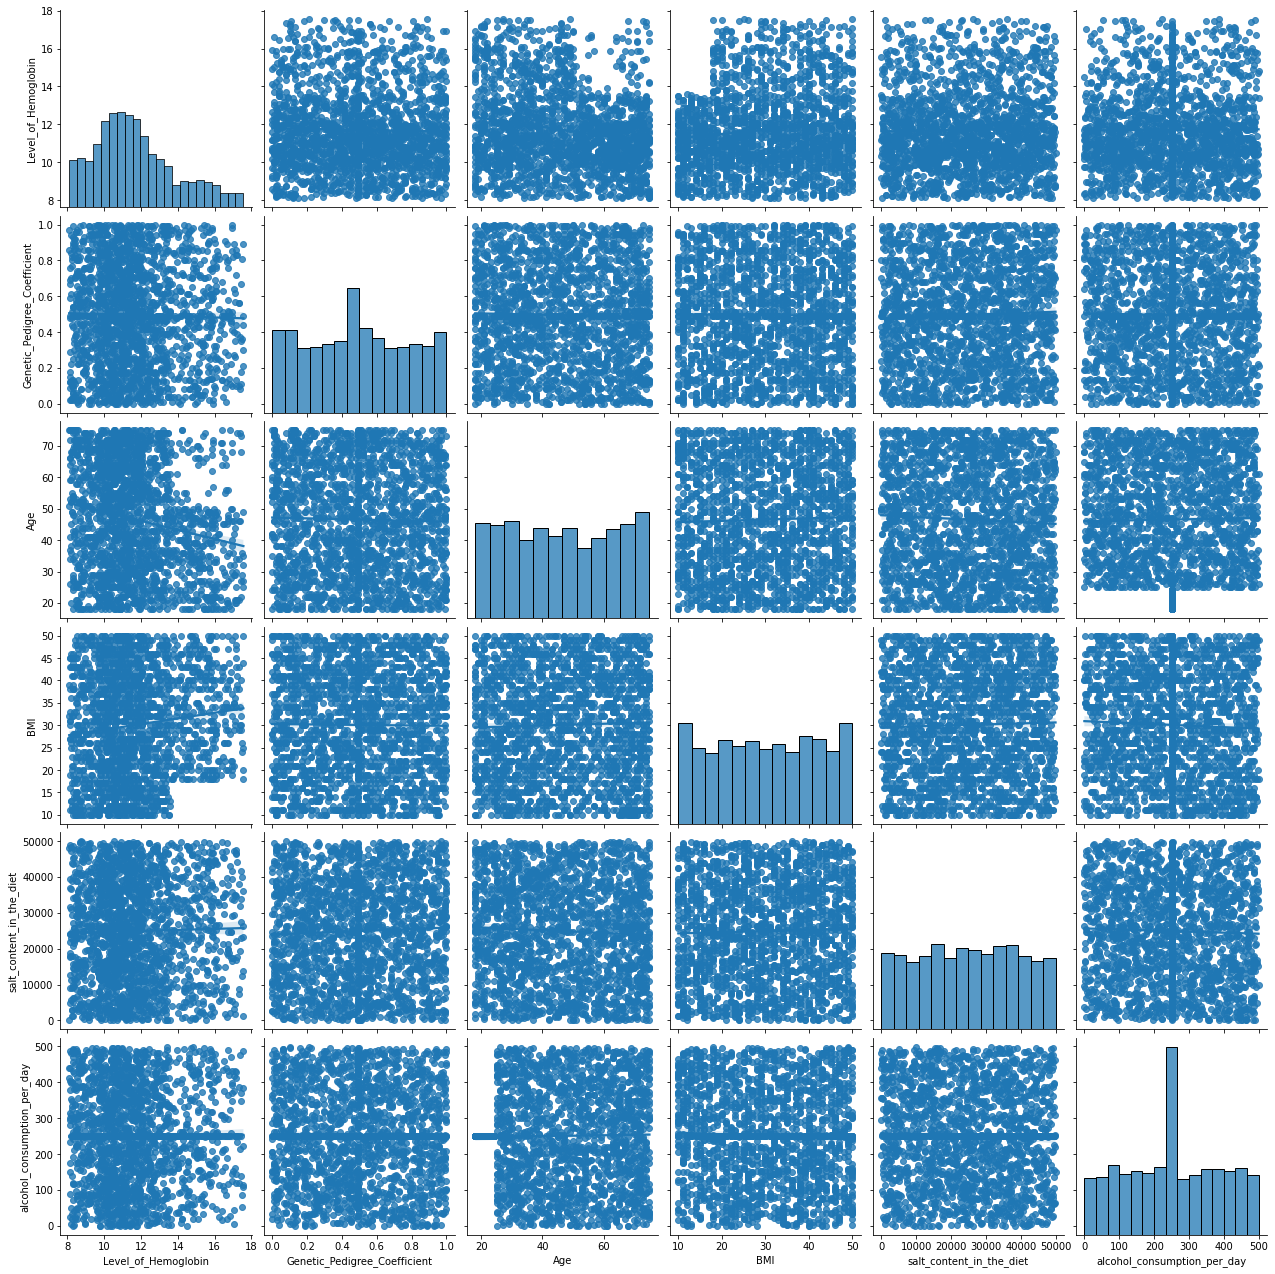

In [52]:
sns.pairplot(data, size=3,
             vars=['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient','Age','BMI',
                  'salt_content_in_the_diet','alcohol_consumption_per_day'] ,kind="reg");

Changing data into Target and Dependent variable.

In [53]:
Target=data['Blood_Pressure_Abnormality']
data.drop(['Patient_Number','Blood_Pressure_Abnormality'], axis = 1, inplace =True)


In [54]:
data.shape
Target.shape

(2000,)

Splitting of data into taain and test

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, Target, test_size=0.2, random_state=0)

**Model Building**

Training with Naive Bayes

In [56]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [57]:
nb_predict_train = nb_model.predict(X_train)
# Accuracy
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy on Training data: 0.9525



In [58]:
nb_predict_test = nb_model.predict(X_test)
# Accuracy
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy on Test data: 0.9575



Naive Bayes model performance

In [59]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[204   4]
 [ 13 179]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       208
           1       0.98      0.93      0.95       192

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



Training with Random Forest

In [60]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train)   

RandomForestClassifier(n_estimators=10, random_state=42)

In [61]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy on Training data: 0.9975


In [62]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy on Test data: 0.9675


Random forest model performance

In [63]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[202   6]
 [  7 185]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       208
           1       0.97      0.96      0.97       192

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



Hyperparameter tuning with Cross validation for Random Forest

In [64]:
# Create the parameter grid based on the results of random search 
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid = params, cv = 3)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 20, 30]})

In [65]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=10)

In [66]:
rf_model = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=80, max_features='auto',
            min_samples_leaf=3, min_samples_split=8,n_estimators=100)
rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)

print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy on Training data: 0.9831


In [67]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy on Test data: 0.9675


Hyperparameter tuning Random forest model performance

In [68]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[201   7]
 [  6 186]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       208
           1       0.96      0.97      0.97       192

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



Training with Gradient Booster

In [69]:
clf = GradientBoostingClassifier(n_estimators=100)
clf=clf.fit(X_train, y_train.ravel())
predict_train = clf.predict(X_train)
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))

Accuracy on Training data: 0.9881


In [70]:
predict_test = clf.predict(X_test)
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, predict_test)))

Accuracy on Test data: 0.9625


 Gradient Boost model performance

In [71]:
print(metrics.confusion_matrix(y_test, predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, predict_test))

[[201   7]
 [  8 184]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       208
           1       0.96      0.96      0.96       192

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

